# DIC uptake by season and region

In [1]:
import scipy
import netCDF4 as nc
import numpy as np
import pickle
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
import cmocean as cm
# import pipvis as vp
from importlib import reload
from salishsea_tools import (
viz_tools)
import arrow
import glob

In [2]:
tcl = '/ocean/tjarniko/MEOPAR/analysis_tereza/notebooks/CLUSTER_PAPER/CLEAN/KEY_PAPERFIGURES/pkls/BIO_clno_5_2015_reass.pkl'
xs_pkl = '/ocean/tjarniko/MEOPAR/analysis_tereza/notebooks/CLUSTER_PAPER/CLEAN/KEY_PAPERFIGURES/pkls/Xcoords_for571_stations.pkl'
ys_pkl = '/ocean/tjarniko/MEOPAR/analysis_tereza/notebooks/CLUSTER_PAPER/CLEAN/KEY_PAPERFIGURES/pkls/Ycoords_for571_stations.pkl'

cldes = pickle.load(open(tcl, 'rb'))
xs = pickle.load(open(xs_pkl, 'rb'))
ys = pickle.load(open(ys_pkl, 'rb'))

ys_csog = ys[cldes == 3]
xs_csog = xs[cldes == 3]

ys_nsog = ys[cldes == 4]
xs_nsog = xs[cldes == 4]

ys_jdf = ys[cldes == 5]
xs_jdf = xs[cldes == 5]

bath = '/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc'
grid = nc.Dataset(bath)
# print(grid)
# print(grid['gdept_1d'][0,26])
tmask = (grid['tmask'][0,0,:,:])
regmask = np.copy(tmask)
tmask_24 = (grid['tmask'][0,24,:,:])
regmask_24 = np.copy(tmask)
tmask_26 = (grid['tmask'][0,26,:,:])
regmask_26 = np.copy(tmask)

for i in range(0,len(ys_csog)):
    tx = xs_csog[i]
    ty = ys_csog[i]
    regmask[ty-5:ty+5,tx-5:tx+5] = 3
    regmask_24[ty-5:ty+5,tx-5:tx+5] = 3
    regmask_26[ty-5:ty+5,tx-5:tx+5] = 3
for i in range(0,len(ys_nsog)):
    tx = xs_nsog[i]
    ty = ys_nsog[i]
    regmask[ty-5:ty+5,tx-5:tx+5] = 4
    regmask_24[ty-5:ty+5,tx-5:tx+5] = 4
    regmask_26[ty-5:ty+5,tx-5:tx+5] = 4
for i in range(0,len(ys_jdf)):
    tx = xs_jdf[i]
    ty = ys_jdf[i]
    regmask[ty-5:ty+5,tx-5:tx+5] = 5
    regmask_24[ty-5:ty+5,tx-5:tx+5] = 5
    regmask_26[ty-5:ty+5,tx-5:tx+5] = 5

regmask[tmask==0] = 0
regmask_24[tmask_24==0] = 0
regmask_26[tmask_26==0] = 0

## adjust your regmask

xs = np.zeros([898,398])
ys = np.zeros([898,398])

for i in range(0,398):
    xs[:,i] = i
for j in range(0,898):
    ys[j,:] = j
    
regmask[(regmask == 5) & (ys > 700)] = 1
regmask[(regmask == 5) & (xs < 20)] = 1
regmask[(regmask == 3) & (ys < 225)] = 1
regmask[(regmask == 3) & (ys < 350) & (xs < 290)] = 1
regmask[(regmask == 3) & (ys < 350) & (xs > 290)] = 1
regmask[(regmask == 3) & (ys < 300) & (xs > 280) & (xs < 320)] = 1
# tmask[(regmask == 5) & (ys > 700)] = 1

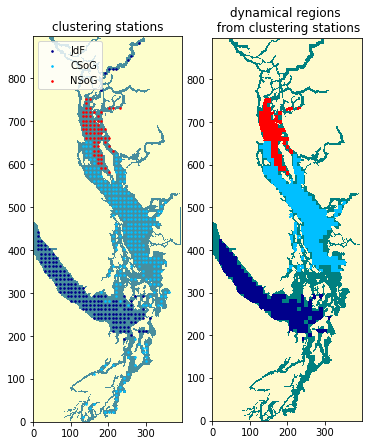

In [3]:
import matplotlib.colors as colors

fact = 1
fig = plt.figure(figsize=(9.1*fact, 7.09*fact))
ax = plt.subplot2grid((3,3), (0,1), colspan=1, rowspan=3)
#ax.text(0.04,.94,'f)', fontsize = 12, weight = 'bold', transform=ax.transAxes)
viz_tools.set_aspect(ax)    

cmap = colors.ListedColormap(['lemonchiffon','teal','chartreuse','deepskyblue','red','darkblue'])
boundaries = [0,1,2,3,4,5,6]
norm = colors.BoundaryNorm(boundaries, cmap.N, clip=True)
w = plt.pcolormesh(regmask, cmap=cmap, norm=norm)
#plt.colorbar(w)
ax.set_title('dynamical regions \n from clustering stations')

ax = plt.subplot2grid((3,3), (0,0), colspan=1, rowspan=3)
ts = 10
mesh = ax.pcolormesh(tmask, vmin=0, vmax=2, cmap = cm.cm.deep)
pts = ax.scatter(xs_jdf,ys_jdf,\
                 s=ts,c='darkblue',marker='.', label = 'JdF')
pts = ax.scatter(xs_csog,ys_csog,\
                 s=ts,c='deepskyblue',marker='.', label = 'CSoG')
pts = ax.scatter(xs_nsog,ys_nsog,\
                 s=ts,c='red',marker='.', label = 'NSoG')
ax.set_title('clustering stations')
plt.legend()

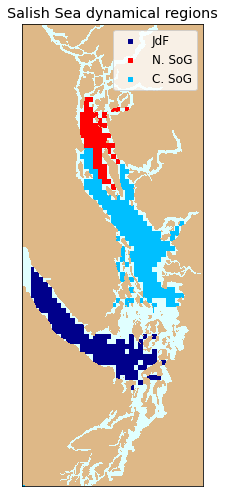

In [4]:
import matplotlib.colors as colors
ts =10
fact = 1.2

#rcparams
plt.rcParams.update({'font.size':12})
font = {'family' : 'normal',
'weight' : 'bold',
'size'   : 12}

fig = plt.figure(figsize=(9.1*fact, 7.09*fact))
ax = plt.subplot2grid((1,1), (0,0), colspan=1, rowspan=3)
#ax.text(0.04,.94,'f)', fontsize = 12, weight = 'bold', transform=ax.transAxes)
viz_tools.set_aspect(ax)    

cmap = colors.ListedColormap(['burlywood','lightcyan','chartreuse','deepskyblue','red','darkblue'])
boundaries = [0,1,2,3,4,5,6]
norm = colors.BoundaryNorm(boundaries, cmap.N, clip=True)
w = plt.pcolormesh(regmask, cmap=cmap, norm=norm, alpha = 1)

ax.scatter(-1,-1, marker = 's', s=ts,c='darkblue', label = 'JdF')
ax.scatter(-1,-1, marker = 's', s=ts,c='red', label = 'N. SoG')
ax.scatter(-1,-1, marker = 's', s=ts,c='deepskyblue', label = 'C. SoG')
#plt.colorbar(w)
ax.set_title('Salish Sea dynamical regions')
ax.set_xlim([0,398])
ax.set_ylim([0,898])
ax.set_xticks([])
ax.set_yticks([])
# ax = plt.subplot2grid((3,3), (0,0), colspan=1, rowspan=3)
# ts = 10
# mesh = ax.pcolormesh(tmask, vmin=0, vmax=2, cmap = cm.cm.deep)
# pts = ax.scatter(xs_jdf,ys_jdf,\
#                  s=ts,c='darkblue',marker='.', label = 'JdF')
# pts = ax.scatter(xs_csog,ys_csog,\
#                  s=ts,c='deepskyblue',marker='.', label = 'CSoG')
# pts = ax.scatter(xs_nsog,ys_nsog,\
#                  s=ts,c='red',marker='.', label = 'NSoG')
# ax.set_title('clustering stations')
plt.legend()

In [5]:
csize = pickle.load(open('/data/tjarniko/MEOPAR/analysis_tereza/notebooks/PI_CARBON_PAPER/MAIN_ANALYSIS/pkls/cellsize_alg2.pkl', 'rb'))#  * sec_day * 1.11

csize_surf = csize[0,:,:]
csize_surf[np.isnan(csize_surf)] = 0
print(np.min(csize_surf))

regmask3d = np.zeros([40,898,398])
for i in range(0,40):
    regmask3d[i,:,:] = regmask

0.0


In [6]:
s = (np.sum(csize_surf[regmask == 1]))
n = (np.sum(csize_surf[regmask == 4]))
c = (np.sum(csize_surf[regmask == 3]))
j = (np.sum(csize_surf[regmask == 5]))

print((n+c+j)/(n+c+j+s))


s = (np.nansum(csize[regmask3d == 1]))
n = (np.nansum(csize[regmask3d == 4]))
c = (np.nansum(csize[regmask3d == 3]))
j = (np.nansum(csize[regmask3d == 5]))


print((n+c+j)/(n+c+j+s))

0.5089938171715778
0.6369454651973123


In [7]:
# start ='2017-01-01'
# end ='2017-12-31'


# runhorse = True

# if runhorse:
#     DIC_uptake = np.zeros([3,365])
#     unc_DIC_uptake = np.zeros([3,365])

#     start_run = arrow.get(start)
#     end_run = arrow.get(end)

#     arrow_array = []

#     for r in arrow.Arrow.span_range('day', start_run, end_run):
#         arrow_array.append(r)

#     dayslen = len(arrow_array)
    
#     for i in range(0,dayslen):

#         tdate = arrow_array[i][0]
#         print(tdate)
#         daystr = tdate.format('YYYYMMDD')

# #         if advdif:
# #             q4 = '/data/tjarniko/results/FUTURE_runs/NEWBUDGET/*_RIVTA5/'
# #         else:
#         q4 = '/data/tjarniko/results/FUTURE_runs/NEWBUDGET/*_RIVTA5/'

#         prdrem = glob.glob(f'{q4}*_1d_*_PRDREM_T_{daystr}-{daystr}.nc')
#         prdrem_boi = nc.Dataset(prdrem[0])
#         prd_DIC = (prdrem_boi['REM DIC'][0,:,:,:])

#         for r in range(3,6):
#             DIC_uptake[r-3,i] = (np.nansum(prd_DIC[regmask_3d == r]))


# pickle.dump(DIC_uptake, open("../pkls/DIC_rem.pkl", 'wb'))

In [8]:
# start ='2017-01-01'
# end ='2017-12-31'


# runhorse = True

# if runhorse:
#     DIC_uptake = np.zeros([3,365])
#     unc_DIC_uptake = np.zeros([3,365])

#     start_run = arrow.get(start)
#     end_run = arrow.get(end)

#     arrow_array = []

#     for r in arrow.Arrow.span_range('day', start_run, end_run):
#         arrow_array.append(r)

#     dayslen = len(arrow_array)
    
#     for i in range(0,1):#dayslen):

#         tdate = arrow_array[i][0]
#         print(tdate)
#         daystr = tdate.format('YYYYMMDD')

# #         if advdif:
# #             q4 = '/data/tjarniko/results/FUTURE_runs/NEWBUDGET/*_RIVTA5/'
# #         else:
#         q4 = '/data/tjarniko/results/FUTURE_runs/NEWBUDGET/*_RIVTA5/'

#         prdrem = glob.glob(f'{q4}*_1d_*_ptrc_T_{daystr}-{daystr}.nc')
#         prdrem_boi = nc.Dataset(prdrem[0])
#         print(prdrem_boi)
#         prd_DIC = (prdrem_boi['REM DIC'][0,:,:,:])

#         for r in range(3,6):
#             DIC_uptake[r-3,i] = (np.nansum(prd_DIC[regmask_3d == r]))


# # pickle.dump(DIC_uptake, open("../pkls/DIC_rem.pkl", 'wb'))

In [9]:
print(np.sum((csize[0:22,250,250]/222394.0735048354)))

30.982100836155986


In [10]:
# start ='2017-01-01'
# end ='2017-12-31'


# runhorse = True

# if runhorse:
#     nitrate = np.zeros([3,365])
#     phyto = np.zeros([3,365])

#     start_run = arrow.get(start)
#     end_run = arrow.get(end)

#     arrow_array = []

#     for r in arrow.Arrow.span_range('day', start_run, end_run):
#         arrow_array.append(r)

#     dayslen = len(arrow_array)
    
#     for i in range(0,dayslen):

#         tdate = arrow_array[i][0]
#         print(tdate)
#         daystr = tdate.format('YYYYMMDD')

# #         if advdif:
# #             q4 = '/data/tjarniko/results/FUTURE_runs/NEWBUDGET/*_RIVTA5/'
# #         else:
#         q4 = '/data/tjarniko/results/FUTURE_runs/NEWBUDGET/*_RIVTA5/'

#         prdrem = glob.glob(f'{q4}*_1d_*_ptrc_T_{daystr}-{daystr}.nc')
#         prdrem_boi = nc.Dataset(prdrem[0])
#         #print(prdrem_boi)
#         nit = (prdrem_boi['nitrate'][0,:,:,:])
#         diat = (prdrem_boi['diatoms'][0,:,:,:])
#         flag = (prdrem_boi['flagellates'][0,:,:,:])
#         cili = (prdrem_boi['ciliates'][0,:,:,:])
#         for r in range(3,6):
#             regmask_top30 = regmask_3d[0:22,:,:]
#             nit_top30 = nit[0:22,:,:]
#             csize_top30 = csize[0:22,:,:]
            
#             w = (nit_top30* csize_top30)
#             nitrate[r-3,i] = np.nansum(w[regmask_top30 ==r])
#             phyto[r-3,i] = (np.nansum(diat[regmask_3d == r]* csize[regmask_3d == r])) +\
#                             (np.nansum(flag[regmask_3d == r]* csize[regmask_3d == r])) +\
#                             (np.nansum(cili[regmask_3d == r]* csize[regmask_3d == r]))
            
# pickle.dump(nitrate, open("../pkls/nitrate.pkl", 'wb'))
# pickle.dump(phyto, open("../pkls/phyto.pkl", 'wb'))



In [12]:

# nit = (prdrem_boi['nitrate'][0,:,:,:])

# print(nit[:,250,250])

In [13]:
# 4209014573.490121
# 1340044079.1980748
# 3475543699.653597


print((np.nansum(csize_surf[regmask == 3])))
print((np.nansum(csize_surf[regmask == 4])))
print((np.nansum(csize_surf[regmask == 5])))
# for i in range(3,5):
#     DIC_uptake[i-3,:] = DIC_uptake[i-3,:]/(np.nansum(csize_surf[regmask == i]))
#     unc_DIC_uptake[i-3,:] = unc_DIC_uptake[i-3,:]/(np.nansum(csize_surf[regmask == i]))

4209014573.490121
1340044079.1980748
3475543699.653597


Text(0.5, 1.0, 'e) depth-integrated phytoplankton biomass by region, year 2017')

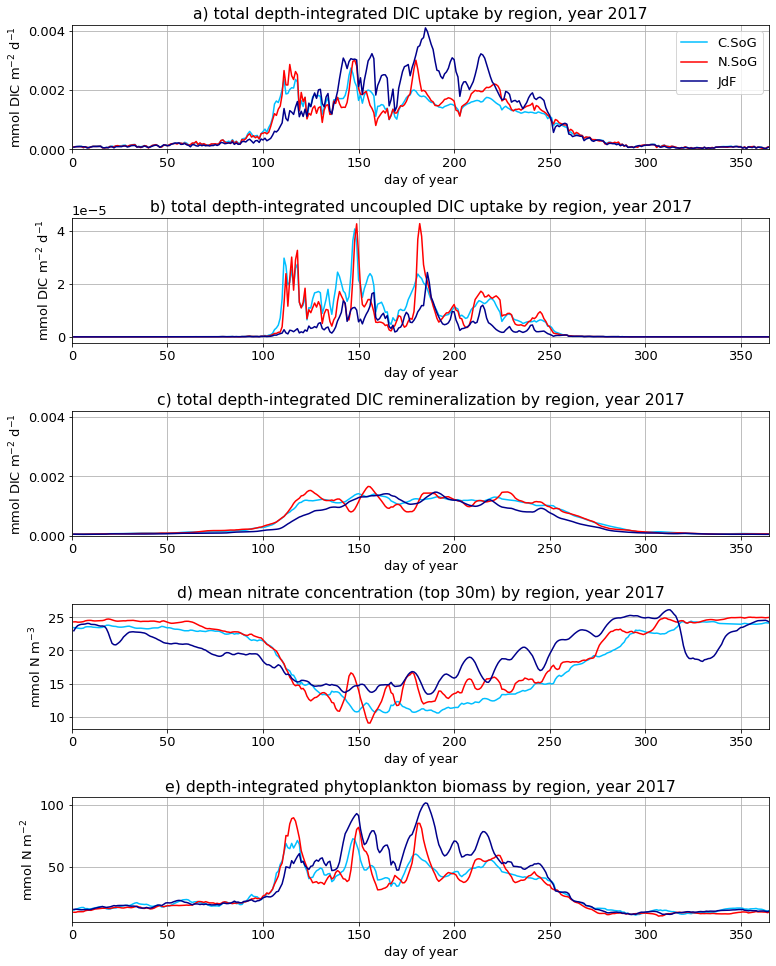

In [17]:
#rcparams
plt.rcParams.update({'font.size': 13})
font = {'family' : 'normal',
'weight' : 'bold',
'size'   : 13}

mons = np.arange(1,366,1)
fact = 0.5

DIC_uptake = pickle.load(open('../pkls/DIC_uptake.pkl', 'rb'))
unc_DIC_uptake = pickle.load(open('../pkls/unc_DIC_uptake.pkl', 'rb'))
DIC_rem = pickle.load(open('../pkls/DIC_rem.pkl', 'rb'))
nitrate = pickle.load(open('../pkls/nitrate.pkl', 'rb'))
phyto = pickle.load(open('../pkls/phyto.pkl', 'rb'))

cols = ['deepskyblue','red','darkblue']
labs = ['C.SoG', 'N.SoG', 'JdF']

fig, axs = plt.subplots(5,1, figsize=(25*fact, 33*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
plt.subplots_adjust(hspace=0.55)

for r in range(3,6):
    axs[0].plot(mons,-1 *DIC_uptake[r-3,:]/(np.nansum(csize_surf[regmask == r])), color = cols[r-3], \
                label = labs[r-3])
    axs[1].plot(mons,unc_DIC_uptake[r-3,:]/(np.nansum(csize_surf[regmask == r])), color = cols[r-3])
    axs[2].plot(mons, DIC_rem[r-3,:]/(np.nansum(csize_surf[regmask == r])), color = cols[r-3], label = labs[r-3])
    axs[3].plot(mons, nitrate[r-3,:]/(np.nansum(csize_surf[regmask == r])*30), color = cols[r-3], label = labs[r-3])
    axs[4].plot(mons, phyto[r-3,:]/(np.nansum(csize_surf[regmask == r])), color = cols[r-3], label = labs[r-3])

    
for i in range(0,5):
    axs[0].legend()
    axs[i].set_xlabel('day of year')
    axs[i].set_ylabel('mmol DIC m$^{-2}$ d$^{-1}$')
    
    axs[i].set_xlim([0,365])
    axs[i].grid()
    
    
axs[0].set_ylim([0,.0042])
axs[2].set_ylim([0,.0042])

axs[3].set_ylabel('mmol N m$^{-3}$')
axs[4].set_ylabel('mmol N m$^{-2}$')

axs[0].set_title('a) total depth-integrated DIC uptake by region, year 2017')
axs[1].set_title('b) total depth-integrated uncoupled DIC uptake by region, year 2017')
axs[2].set_title('c) total depth-integrated DIC remineralization by region, year 2017')
axs[3].set_title('d) mean nitrate concentration (top 30m) by region, year 2017')
axs[4].set_title('e) depth-integrated phytoplankton biomass by region, year 2017')

## calculate some stats 

In [15]:
st = 100
en = 300

for r in range(3,6):
    
    print(r)
    print('dic uptake mmol m2 day')
    dic = -1 *((np.nanmean(DIC_uptake[r-3,st:en]))/(np.nansum(csize_surf[regmask == r])))
    print(dic)
    stddic =((np.nanstd(DIC_uptake[r-3,st:en]))/(np.nansum(csize_surf[regmask == r])))
    print(stddic)
    print('unc dic uptake mmol m2 day')
    unc = (np.nanmean(unc_DIC_uptake[r-3,st:en]))/(np.nansum(csize_surf[regmask == r]))
    print(unc)
    print(unc/dic*100)
    print('dic remineralization mmol m2 day')
    print((np.nanmean(DIC_rem[r-3,st:en]))/(np.nansum(csize_surf[regmask == r])))
    print('phyto')
    print((np.nanmean(phyto[r-3,st:en]))/(np.nansum(csize_surf[regmask == r])))
#     phyto[r-3,:]
#     axs[2].plot(mons, DIC_rem[r-3,:]/(np.nansum(csize_surf[regmask == r])), color = cols[r-3], label = labs[r-3])
#     axs[3].plot(mons, nitrate[r-3,:]/(np.nansum(csize_surf[regmask == r])*30), color = cols[r-3], label = labs[r-3])
#     axs[4].plot(mons, phyto[r-3,:]/(np.nansum(csize_surf[regmask == r])), color = cols[r-3], label = labs[r-3])


3
dic uptake mmol m2 day
0.001266899061790874
0.0006096511938430785
unc dic uptake mmol m2 day
9.527335771445347e-06
0.7520201142131729
dic remineralization mmol m2 day
0.0009636063530942225
phyto
40.11362220891228
4
dic uptake mmol m2 day
0.001325483594592464
0.000693851820387334
unc dic uptake mmol m2 day
8.240416170616592e-06
0.6216912984992626
dic remineralization mmol m2 day
0.0009617356682909379
phyto
40.3345330827142
5
dic uptake mmol m2 day
0.0016692195504188591
0.0010415220480862633
unc dic uptake mmol m2 day
4.074105933318171e-06
0.24407250276309375
dic remineralization mmol m2 day
0.0008168569222623965
phyto
50.205398358350834


In [16]:
print(np.nansum(csize[regmask_3d == 3])/ np.nansum(csize_surf[regmask == 3]))
print(np.nansum(csize[regmask_3d == 4])/ np.nansum(csize_surf[regmask == 4]))
print(np.nansum(csize[regmask_3d == 5])/ np.nansum(csize_surf[regmask == 5]))

NameError: name 'regmask_3d' is not defined

In [ ]:
csize